In [1]:
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
Movie = pd.read_csv('movie.csv',low_memory=False)
Movie_Links_Rating = pd.read_csv('Movie_Links_Rating.csv',low_memory=False)
Rating = pd.read_csv('Rating.csv',low_memory=False)
Genres= pd.read_csv('Genres.csv',low_memory=False)
Movie_Genres = pd.read_csv('Movie_Genres.csv',low_memory=False)
Movie_Production_Country = pd.read_csv('Movie_Production_Country.csv',low_memory=False)
Production_Country = pd.read_csv('Production_Country.csv',low_memory=False)
Movie_Production_Company = pd.read_csv('Movie_Production_Company.csv',low_memory=False)
Production_Company = pd.read_csv('Production_Company.csv',low_memory=False)
Movie_Spoken_Language = pd.read_csv('Movie_Spoken_Language.csv',low_memory=False)
Spoken_Language = pd.read_csv('Spoken_Language.csv',low_memory=False)
Movie_Vote = pd.read_csv('Movie_Vote.csv',low_memory=False)
Cast = pd.read_csv('Cast.csv',low_memory=False)
Movie_Cast = pd.read_csv('Movie_Cast.csv',low_memory=False)
Movie_Crew = pd.read_csv('Movie_Crew.csv',low_memory=False)

# Top 10 Popular Movies

Text(0.5, 1.0, 'Top 10 Popular Movies')

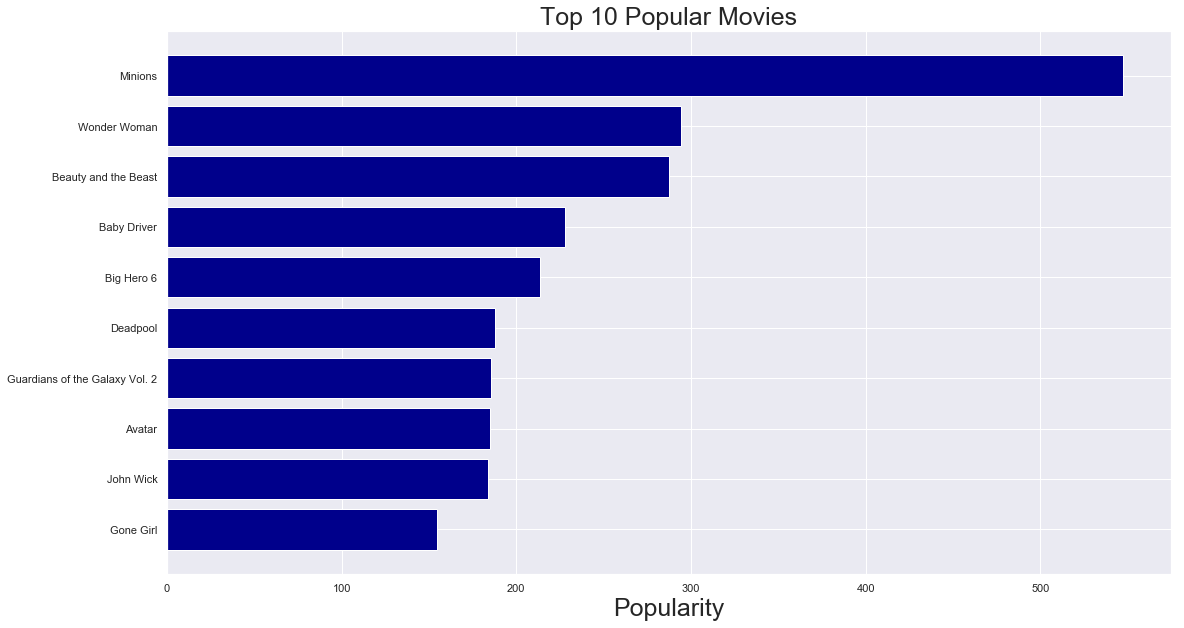

In [3]:
pop= Movie.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='darkblue')

plt.gca().invert_yaxis()
plt.xlabel("Popularity", fontsize=25)
plt.title("Top 10 Popular Movies", fontsize=25)

# Group Release Year

In [4]:
import numpy as np
def parse(x):
    try:
        return int(x)
    except ValueError:
        return np.nan

In [5]:
Movie['release_date'].describe()
Movie['release_date'].head()
original_Movie_len = len(Movie)
print("original_Movie_len:", original_Movie_len)

original_Movie_len: 45419


In [6]:
Movie['release_date'] = pd.to_datetime(Movie['release_date'], format = '%m/%d/%y',errors='coerce' )

In [7]:
Movie['Year'] = Movie['release_date'].apply(lambda x: x.year)
Movie['Month'] = Movie['release_date'].apply(lambda y: y.month)
Movie['Day'] = Movie['release_date'].apply(lambda z: z.day)

In [8]:
Movie = Movie[pd.notnull(Movie['Year'])]

In [9]:
print(Movie.isnull().sum())

id                     0
title                  0
original_language      0
status                80
revenue                0
budget                 0
release_date           0
runtime              246
popularity             0
Year                   0
Month                  0
Day                    0
dtype: int64


In [10]:
Movie = Movie[Movie['Year'] <= 2018]

In [11]:
Movie['Year'] = Movie['Year'].round().astype(int)
Movie['Month'] = Movie['Month'].round().astype(int)
Movie['Day'] = Movie['Day'].round().astype(int)

In [13]:
data1 = Movie['Year'].value_counts().sort_index()
trace1 = go.Scatter(x = data1.index,
                   y = data1.values,
                   marker = dict(color = 'blue'))
layout1 = dict(title = '{} Movies Grouped By Year Of Release'.format(Movie.shape[0]),
              xaxis = dict(title = 'Release Year'),
              yaxis = dict(title = 'Movies'))
fig = go.Figure(data=[trace1], layout=layout1)
iplot(fig)

# How are ratings distributed?

In [14]:
data2 = Rating['rating'].value_counts().sort_index(ascending=False)
trace2 = go.Bar(x = data2.index,
               text = ['{:.1f} %'.format(val) for val in (data2.values / Rating.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = 'darkgrey'),
               y = data2.values,
               marker = dict(color = 'lightblue'))
layout2 = dict(title = 'Rating Distribution'.format(Rating.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count(Percentage)'))
fig = go.Figure(data=[trace2], layout=layout2)
iplot(fig)

In [15]:
data3 = Rating.groupby('movieId')['rating'].count().clip(upper=9999)
trace3 = go.Histogram(x = data3.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 10000,
                                  size = 100),
                     marker = dict(color = 'grey'))
layout3 = go.Layout(title = 'Distribution Of Ratings Per Movie',
                   xaxis = dict(title = 'Ratings Per Movie'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
fig = go.Figure(data=[trace3], layout=layout3)
iplot(fig)

In [16]:
data4= Rating.groupby('userId')['rating'].count().clip(upper=199)
trace4 = go.Histogram(x = data4.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 200,
                                  size = 2),
                     marker = dict(color = 'pink'))
layout4 = go.Layout(title = 'Distribution Of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)
fig = go.Figure(data=[trace4], layout=layout4)
iplot(fig)